# Text Classification Pipeline: From Raw Tweets to Sentiment Prediction 
**This project focuses on sentiment analysis of tweets using the Sentiment140 dataset. It compares the performance of Naive Bayes and Logistic Regression models, enhanced and optimized through GridSearchCV-based hyperparameter tuning.**

In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


## Importing Raw Data

In [2]:
df = pd.read_csv("/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv", encoding = 'Latin-1')
df.shape

(1599999, 6)

In [3]:
df.sample(10)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1005945,4,1880562234,Fri May 22 01:41:07 PDT 2009,NO_QUERY,ramdomthoughts,@SarahSymmonds Does'nt he know where the kitch...
1399399,4,2054233587,Sat Jun 06 06:53:24 PDT 2009,NO_QUERY,Keri_W,So many things to be thankful for. God is goo...
1050969,4,1960962796,Fri May 29 08:46:31 PDT 2009,NO_QUERY,gem85stone,ready for the weekend cannot wait until sunda...
299345,0,1997980729,Mon Jun 01 17:47:28 PDT 2009,NO_QUERY,spicyclubsauce,@Laurenn_Taylor ahh yay! that's so awesome tha...
1590631,4,2191433325,Tue Jun 16 05:15:56 PDT 2009,NO_QUERY,likeamovie,@percipere np girl that shit was made to be sh...
747565,0,2283687588,Mon Jun 22 12:56:45 PDT 2009,NO_QUERY,LiLYYBEE,does NOT feel good at all!!!
819596,4,1553460807,Sat Apr 18 14:19:42 PDT 2009,NO_QUERY,loovely831,@mediamagik yeah and it was crappy eyeliner so...
667777,0,2245716158,Fri Jun 19 16:32:08 PDT 2009,NO_QUERY,lelvir,Eating at Dennys in Philadelphia!!
230137,0,1978669783,Sun May 31 00:04:55 PDT 2009,NO_QUERY,_SuchaLady,I kinda feel bad for making so many jokes abou...
893239,4,1691785505,Sun May 03 18:36:18 PDT 2009,NO_QUERY,clarissacorona,i'm in LOVE with sony vegas 7! making a mix ri...


In [4]:
df.columns

Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')

In [5]:
df.rename(columns = {"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D" : 'text_data'}, inplace= True) 

In [6]:
df.columns

Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_', 'text_data'],
      dtype='object')

In [7]:
df_new = df[['0','text_data']]

In [8]:
df_new.rename(columns = {'0':'lables'}, inplace = True)

/tmp/ipykernel_30/63866745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.rename(columns = {'0':'lables'}, inplace = True)


In [9]:
df_new

,lables,text_data
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
1599994,4,Just woke up. Having no school is the best fee...
1599995,4,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,Happy 38th Birthday to my boo of alll time!!! ...


### Performing Random sampling technique to reduce the load on processing capacity and improve processing time

In [10]:
df_sampled = df_new.sample(frac = 0.02)
df_sampled.shape

(32000, 2)

In [11]:
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32000 entries, 1376857 to 558042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   lables     32000 non-null  int64 
 1   text_data  32000 non-null  object
dtypes: int64(1), object(1)
memory usage: 750.0+ KB


### Exploratory Data Analysis 
Exploration areas:
1. Status of Data Distribution
2. Cleanliness status of the rows
3. Important features to evaluate
4. Structue of Data

### 1. Data Distribution is Even for both classes

<Axes: xlabel='lables'>

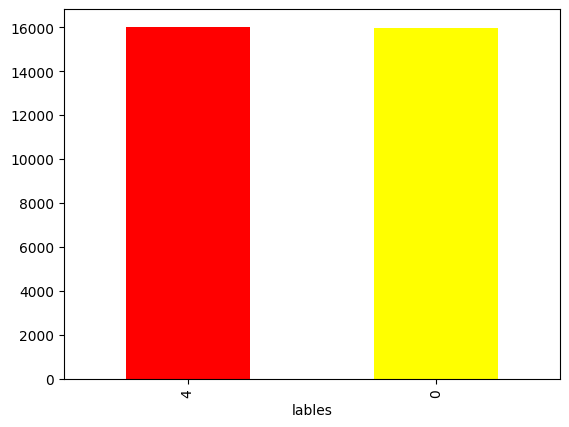

In [12]:
(df_sampled['lables'].value_counts()).plot(kind = 'bar', color = ['red', 'yellow'])

In [14]:
#Restructuring the output to display full window size
pd.reset_option('display.max_colwidth')

### 2,Preprocessing to Clean the data
Steps includes
1. Lowecasing the entire sampled data
2. Using Regex to filter out uncleaned parts like HTML links, special characters and punctuations
3. Converting the large rows of data to smaller chunks(TOKENIZATION) for improved understanding of contexts
4. Removing stopwords like and or which don't directly contribute to context of the sentences
5. Using Porter Stemmer to convert the words to root values

In [15]:
#lowecasing
df_sampled['text_data']=df_sampled['text_data'].str.lower()

In [16]:
df_sampled['text_data'].sample(10)

1211558       so, 4dien buldozers   http://twitpic.com/6e3d1
282756     done with my sophomore year.  only two more ye...
1289165    has just sat her history exam, fun times!, jus...
1293104    having a taking back sunday morning  ilovethem...
1595111    chilling in front of the tv after a loong day ...
135544                                              mcgrath 
1557682    @holidaycheck  after that embarrassing relaunc...
645134     @lizzyborden6 i have the new sidekick and the ...
1144764                                just joined twitter! 
933101     yeah baby! my nuggets are going to the third r...
Name: text_data, dtype: object

In [17]:
import string

## we need to remove links,special characters like @,# and also punctuations like . or ,
df_sampled['text_data'] = df_sampled['text_data'].replace(r'http\S+|www.\S+', '', regex=True) #for links
df_sampled['text_data'] = df_sampled['text_data'].replace(r'@\w+', '', regex=True)  #for @ symbol
df_sampled['text_data']  = df_sampled['text_data'] .replace(r'#\w+', '', regex=True) #for # symbol




In [45]:
#importing libraries to identify punctuations 
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [19]:
df_sampled['text_data'].sample(10)

975164     a day at the beach with the girls. oh how i've...
772698     just had basketball...and now i have the worst...
1506676    learning how to sing dalamnya kasihmu in bahas...
1021637        yep yep  and a lot of it is open source too. 
287599      i know but i haven't gotten it in awhile  mar...
916998     wonder what white supremists have to say about...
1001729     &quot;stop thinking about cutting my throat w...
660901      ack... my wheel is acting up!  don't know whe...
1223895     people line up to have their ass abused by me...
595904     steven is mean. he said im dumb and an idiot. ...
Name: text_data, dtype: object

In [20]:
#confirming the data type of the feature
print(df_sampled['text_data'].dtype)

object


In [21]:
#converting the data type
print(df_sampled['text_data'].apply(type).value_counts())


text_data
<class 'str'>    32000
Name: count, dtype: int64


### Tokenizing the resampled data

In [22]:
#applying tokenize functiions
from nltk.tokenize import word_tokenize

df_sampled['text_data'] = df_sampled['text_data'].apply(word_tokenize)

In [44]:
#Output after tokenization
df_sampled['text_data'].sample(10)

552252     [ca, n't, believe, another, year, gone, alread...
681669     [help, !, need, suggestions, big, tasty, impre...
80400      ['m, dreading, tomorrow, morning, ,, sisters, ...
1106657    [remember, ..., .7, days, without, god, makes,...
1178620    [ate, lunch, (, burrito, ), gon, na, stuff, ar...
1434088                         [mmm, ,, trader, joe, 's, .]
622065     [thanks, !, n't, think, 'll, ever, see, ,, get...
1539329    [thats, great, ., im, complaining, either, ,, ...
1134751       [gon, na, give, score, updates, right, ?, lol]
1490726                         [glade, liked, 'll, minutes]
Name: text_data, dtype: object

### Removing the stop words(Unnecessary words)

In [24]:
## stopword download
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
print(len(set(stopwords.words('english'))))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
198


### Stop Word Removal

In [25]:
#stopword removal 
def remove(text):
    stop_words =  set(stopwords.words('english'))
    clear = []
    for word in text:
        if word not in stop_words:
            clear.append(word)
    return clear

df_sampled['text_data'] = df_sampled['text_data'].apply(remove)

In [26]:
df_sampled #Output after removal of stopwords

,lables,text_data
1376857,4,"[painting, nails, hahaha, pumped, tonight, !, xd]"
829362,4,"[eyesonfps, good, ,, thanks, telling, frams, p..."
63543,0,"['s, cases, swine, flu, appache, ., 's, gon, n..."
1166260,4,"[lying, bed, dark, shuffle, ..., therapy]"
1345091,4,"[rotfl, !, !, !, absolutely, fantastic, !, !, ..."
...,...,...
1397810,4,"[yo, yo, yo, semangat, yoo, umb, nyaaa]"
1273506,4,"[favorite, show, all-time, .]"
282136,0,"[sorry, hear, .]"
603466,0,"[happened, ?]"


### Stemming each row 

In [27]:
#stemming
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def stem_tokens(tokens):
    if tokens:  # Check if the list exists and is not None
        return [porter.stem(word) for word in tokens]
    return tokens  # Return None or an empty list if tokens are None

# Apply the stemming function to the 'text_data' column
df_sampled['stemmed_text'] = df_sampled['text_data'].apply(stem_tokens)
# Check the result
print(df_sampled[['text_data', 'stemmed_text']])

                                                 text_data  \
1376857  [painting, nails, hahaha, pumped, tonight, !, xd]   
829362   [eyesonfps, good, ,, thanks, telling, frams, p...   
63543    ['s, cases, swine, flu, appache, ., 's, gon, n...   
1166260          [lying, bed, dark, shuffle, ..., therapy]   
1345091  [rotfl, !, !, !, absolutely, fantastic, !, !, ...   
...                                                    ...   
1397810            [yo, yo, yo, semangat, yoo, umb, nyaaa]   
1273506                      [favorite, show, all-time, .]   
282136                                    [sorry, hear, .]   
603466                                       [happened, ?]   
558042   [got, early, download, iphone3.0, ., show, ., ...   

                                              stemmed_text  
1376857        [paint, nail, hahaha, pump, tonight, !, xd]  
829362   [eyesonfp, good, ,, thank, tell, fram, per, se...  
63543    ['s, case, swine, flu, appach, ., 's, gon, na,...  
1166260    

In [28]:
df_sampled.sample(10)

,lables,text_data,stemmed_text
1417460,4,"[get, 100, followers, day, using, add, everyon...","[get, 100, follow, day, use, add, everyon, tra..."
1206760,4,"['ve, heard, tell, fishing, good, even, catchi...","['ve, heard, tell, fish, good, even, catch, ba..."
152538,0,"[trying, think, something, ., ca, n't, wait, g...","[tri, think, someth, ., ca, n't, wait, go, lat..."
1389531,4,"[4, left, finish, wednesday..i, cant, wait, !,...","[4, left, finish, wednesday..i, cant, wait, !,..."
145982,0,"[ohmygosh, @, footy, .]","[ohmygosh, @, footi, .]"
1181619,4,"[tv, turned, right, ,, danny, ., good, luck, ,...","[tv, turn, right, ,, danni, ., good, luck, ,, ..."
1500824,4,"[hahaha, eat, work, together, considered, bles...","[hahaha, eat, work, togeth, consid, bless, leh..."
160872,0,"['ve, got, catch, bus, work]","['ve, got, catch, bu, work]"
632603,0,"[ah, sry, ditched, ya, awhile, ugh, finals, to...","[ah, sri, ditch, ya, awhil, ugh, final, tomorr..."
1521753,4,"['ll, probably, update, tomorrow, later, finis...","['ll, probabl, updat, tomorrow, later, finish,..."


## Feature Extraction 
Steps Include:
1. Creating a word cloud
2. Using TF-IDF vectorizer to convert the text to numerical values or embeddings

In [29]:
#feature extraction


df_sampled['stemmed_text_str'] = df_sampled['stemmed_text'].apply(lambda x:" ".join(x))

In [30]:
list(df_sampled['stemmed_text_str'])[0:5]

['paint nail hahaha pump tonight ! xd',
 "eyesonfp good , thank tell fram per second , rofl . 'll game",
 "'s case swine flu appach . 's gon na come lawton soon",
 'lie bed dark shuffl ... therapi',
 "rotfl ! ! ! absolut fantast ! ! ! 's amaz creativ free time ! ! !"]

In [46]:
#Use of TF-IDF vectorizer


from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

tfidf_matrix  = vectorizer.fit_transform(df_sampled['stemmed_text_str'])
print(type(tfidf_matrix  ))

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

<class 'scipy.sparse._csr.csr_matrix'>


## Training the Model - 
1. Logistic Regression
2. Naive Bayes Classification

In [32]:
#train_test_split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(tfidf_df,df_sampled['lables'],random_state = 42,test_size = 0.2 )

In [47]:
#Performing Logistic Regression 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


model = LogisticRegression(class_weight = 'balanced',random_state = 42)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
classification_score = classification_report(y_test,y_pred,output_dict= True)

print(accuracy)
print(pd.DataFrame(classification_score))



0.75109375
                     0            4  accuracy    macro avg  weighted avg
precision     0.761656     0.741374  0.751094     0.751515      0.751509
recall        0.730457     0.771705  0.751094     0.751081      0.751094
f1-score      0.745730     0.756236  0.751094     0.750983      0.750986
support    3198.000000  3202.000000  0.751094  6400.000000   6400.000000


In [34]:
#applying naive bayes

from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB

model_NB = MultinomialNB(alpha = 1.5)

model_NB.fit(X_train,y_train)

y_pred = model_NB.predict(X_test)

accuracy_score = accuracy_score(y_test,y_pred)

print(f'the NB accyracy is {accuracy_score}')

the NB accyracy is 0.74125


### Optimisation of the Classification score
1. By using Cross validation and GridSearchCV

In [35]:
##crossvalidation and hyper parameter tuning
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_NB, tfidf_df, df_sampled['lables'], cv=5)
print(f"Mean Cross-Validated Accuracy: {scores.mean():.2f}")


Mean Cross-Validated Accuracy: 0.73


In [36]:
#hyperparameter tuning 
from sklearn.model_selection import GridSearchCV


param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0, 1.5],
    'fit_prior': [True, False]
}

# Perform Grid Search with cross-validation
grid_search_nb = GridSearchCV(model_NB, param_grid_nb, cv=5, scoring='accuracy')
grid_search_nb.fit(X_train, y_train)

# Best model and its accuracy
best_model_nb = grid_search_nb.best_estimator_
best_accuracy_nb = grid_search_nb.best_score_



In [37]:
print(best_model_nb,best_accuracy_nb)

MultinomialNB(alpha=1.5) 0.7335156249999999


### Downloading the model for future Web application

In [40]:
#downloading the model

import pickle
with open('ln_model.pkl','wb') as file:
    pickle.dump(model,file)
    

In [41]:
import pickle
with open('vectorizer.pkl','wb') as file:
    pickle.dump(vectorizer,file)

In [42]:
print("numpy", np.__version__)
print("pandas", pd.__version__)
print("scklearn", sklearn.__version__)
print("nltk", nltk.__version__)

numpy 1.26.4
pandas 2.2.3
scklearn 1.2.2
nltk 3.2.4
